# Harjoitus 2
## Tehtävä 1
### a)

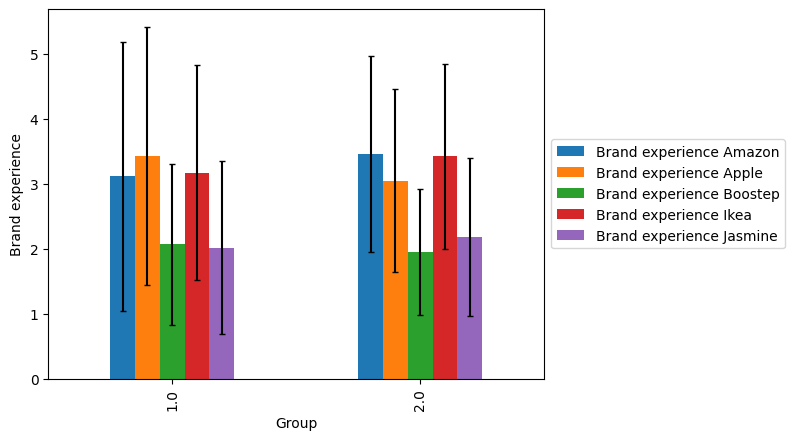

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt

df_brands, meta = pyreadstat.read_sav("../data/brands.sav")
df_brands.columns = meta.column_labels  # nimetään sarakkeet järkevimmiksi
brand_labels = ["Brand experience Amazon", "Brand experience Jasmine", "Brand experience Apple", "Brand experience Boostep", "Brand experience Ikea"]
df_experiences = df_brands[brand_labels + ["Group"]]

# statistiikkaa
experiences_mean = df_experiences.pivot_table(index="Group", values=brand_labels, aggfunc="mean")
experiences_std = df_experiences.pivot_table(index="Group", values=brand_labels, aggfunc="std")

# visualisointi
experiences_mean.plot(kind="bar", yerr=2*experiences_std, ylabel="Brand experience", capsize=2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

N.B.: Jouduin lukemaan tehtävänannon monta kertaa, ennen kuin ymmärsin sen mielestäni. Toivottavasti yllä on nyt sitä mitä haetaan, mutta jos tehtävän luonteen huomioi, niin yllä oleva kuva on asianmukainen.

Kuvaajasta nähdään, että brändien väliset vaihtelut ryhmien kesken ovat luonteeltaan samanlaista. Boostep ja Jasmine ovat keskiarvoltaan pienimpiä, kuin muut brändit, ja keskenään samaa suuruusluokkaa. Vastaavasti muut brändit (Amazon, Apple ja Ikea) ovat keskenään samaa suuruusluokkaa kummassakin ryhmässä. Luottamusväli (kuvassa ilmoitettu on oikeasti 95,5%, mutta tämä on yleinen konventio) on kummassakin ryhmässä kaikkissa brändeissä suhteellisen suurta, mutta ne antavat osviittaa siitä, mistä perusjoukon keskiarvot jokaiselle brändille voidaan löytää 95% luottamuksella. Huomiona vielä, että testijoukko on suhteellisen pieni (N=20 per ryhmä), mikä myös selittää laajat luottamusvälit. Brändikokemuksissa ei siis ole havaittavissa merkittäviä eroja testiryhmien välillä.

### b)

Nollahypoteesi: Boostepin ja Jasminen brändikokemukset __eivät__ eroa toisistaan.

Koska a-kohdan perusteella ryhmien välillä ei ollut merkittävää eroa brändikokemuksissa, on perusteltua yhdistää testijoukkojen tulokset brändikokemuksista yhdeksi datajoukoksi. Tarkastellaan ensiksi riippuvien muuttujien jakaumaa.

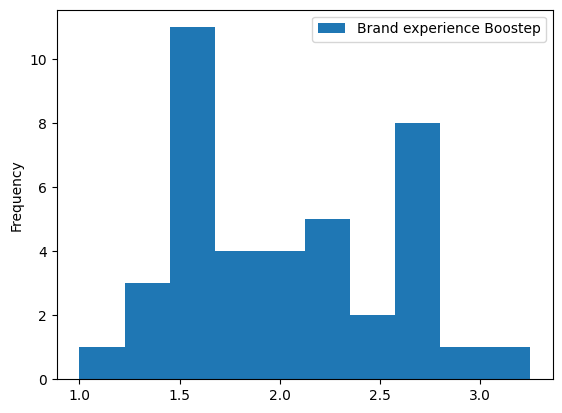

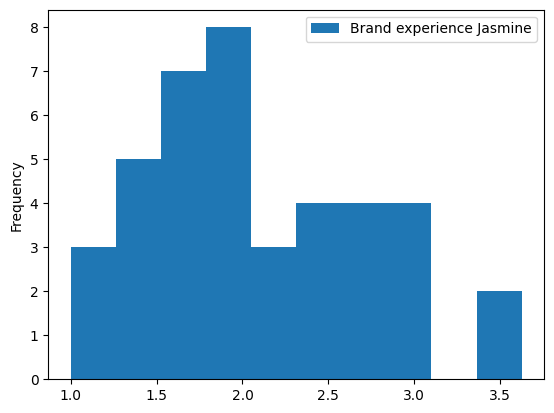

In [2]:
df_experiences[["Brand experience Boostep"]].plot(kind="hist")
plt.show()
df_experiences[["Brand experience Jasmine"]].plot(kind="hist")
plt.show()

Silmiä hieman siristämällä, arvioidaan jakaumat normaalijakaumiksi. Koska tarkasteltavat muuttujat ovat jatkuvia, vertailtavia luokkia on kaksi ja kyseessä on ryhmien välinen asetelma, valitaan testiksi kahden riippumattomat otoksen t-testi.

In [3]:
from scipy.stats import ttest_ind

tstat, pvalue = ttest_ind(df_experiences[["Brand experience Boostep"]], df_experiences[["Brand experience Jasmine"]])
print(f"t = {tstat}; p = {pvalue}")

t = [-0.6823372]; p = [0.49704715]


Koska p-arvo on nyt selvästi > 0,05, eli ero ei ole merkitsevä. Nollahypoteesia ei hylätä, eli brändikokemukset Boostepin ja Jasminen välillä eivät eroa toisistaan merkitsevästi. Tämä havainto ei ole ristiriidassa kohdan a) kanssa.

### c)

Nollahypoteesi: Amazonin ja Jasminen brändikokemukset __eivät__ eroa toisistaan.

Tarkastellaan Amazonin brändikokemusten jakaumaa.

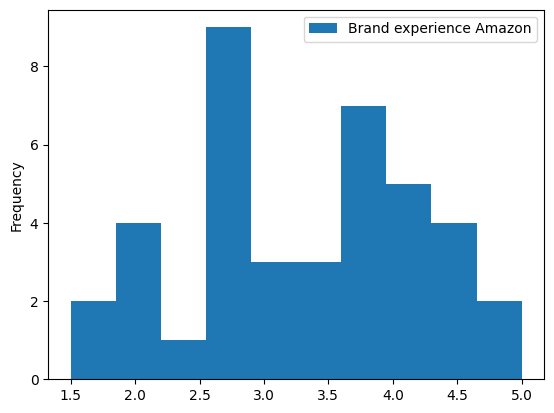

In [4]:
df_experiences[["Brand experience Amazon"]].plot(kind="hist")
plt.show()

Kuvaajan perusteella, oletetaan Amazoniin liittyvä brändikokemus myös normaalijakautuneeksi. Samin perustein, kuin b-kohdassakin, valitaan testiksi kahden riippumattoman otoksen t-testi.

In [5]:
tstat, pvalue = ttest_ind(df_experiences[["Brand experience Amazon"]], df_experiences[["Brand experience Jasmine"]])
print(f"t = {tstat}; p = {pvalue}")

t = [6.77332028]; p = [2.11999689e-09]


Koska p-arvo on nyt selvästi << 0,05, voimme hylätä nollahypoteesin ja todeta, että Amazonin ja Jasminen brändikokemusten välillä on merkitsevä ero (tulos on tilastollisesti merkitsevä). Lasketaan efektin koko ja suunta (joka voidaan tehdä, koska jakaumien ero on tilastollisesti merkitsevä):

In [6]:
def calc_cohens_d(mean_1, mean_2, std_1, std_2):
    cohens_d = (mean_1 - mean_2) / np.sqrt((std_1**2 + std_2**2) / 2)
    
    return cohens_d

cohens_d = calc_cohens_d(df_experiences["Brand experience Amazon"].mean(),
              df_experiences["Brand experience Jasmine"].mean(),
              df_experiences["Brand experience Amazon"].std(),
              df_experiences["Brand experience Jasmine"].std())

print(f"d = {cohens_d}")

d = 1.5145604572017886


Koska Cohenin d-arvo on > 0.8, efektin koko on suuri. Käyttäjien kokema brändikokemus Amazonin kohdalla on suurempaa, kuin Jasminen kohdalla.

## Tehtävä 2

Ladataan aineisto käyttöön ja osioidaan se käsittelyn helpottamiseksi. Putsataan aineisto myös, jos siinä on puuttuvia kohtia (sukupuoli tai yhtk.kiinnostus).

In [7]:
df_baro, meta_baro = pyreadstat.read_sav("../data/tiede_baro_2019.sav")
baro_kiinnostus = df_baro[["sukupuoli", "yhtk.kiinnostus"]].dropna()

print(f"Poistettuja rivejä: {df_baro[['sukupuoli', 'yhtk.kiinnostus']].shape[0] - baro_kiinnostus.shape[0]}")

Poistettuja rivejä: 39


In [8]:
print(f"Miehiä: {baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 1].shape[0]}")
print(f"Naisia: {baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 2].shape[0]}")
print(f"Muu: {baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 3].shape[0]}")

Miehiä: 1102
Naisia: 1068
Muu: 0


Miehiä ja naisia on lähestulkoon sama määrä, joten näiden kahden ryhmän välinen vertailu on mielekästä. Lisäksi, muu-sukupuolisia ei tutkimuksessa esiintynyt.

Tarkastellaan seuraavaksi jakautuuko käsiteltävä aineisto miten.

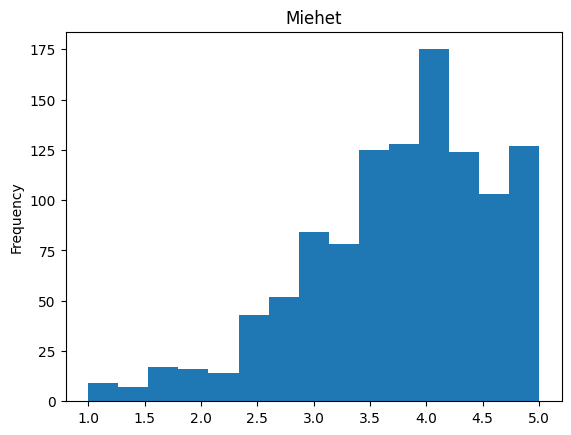

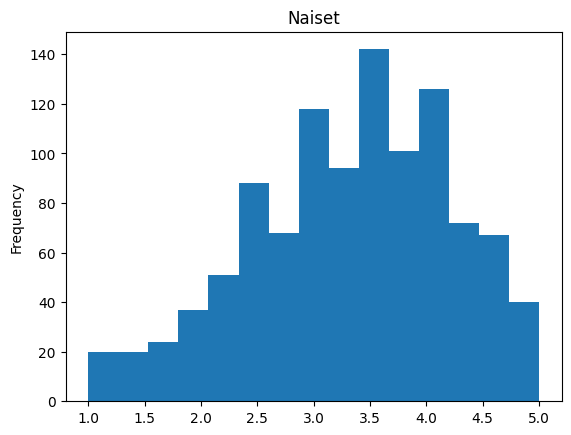

In [9]:
baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 1]['yhtk.kiinnostus'].plot(kind="hist", bins=15, xlabel="yhtk.kiinnostus", title="Miehet")
plt.show()
baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 2]['yhtk.kiinnostus'].plot(kind="hist", bins=15, xlabel="yhtk.kiinnostus", title="Naiset")
plt.show()

Yllä olevan perusteella, jakaumat ovat vinoja---niissä on selvästi häntä vasemmalla (selkeämpi miesten kohdalla). Täytyy siis käyttää epämarametristä testiä. Koska tarkkailusa on kaksi luokkaa ja ryhmien välinen asetelma, päädymme käyttämään Mann-Whitney U -testiä. 

(Tässä kohtaa heräsikin kysymys: mitä jos kaksi tarkkailtavaa jakaumaa ovat erilaisia, esimerkiksi toinen on selvästi normaalijakautunut ja toinen vino? Oma intuitio sanoo, että silloin käytetään epämarametristä testiä myös.)

Testattava nollahypoteesi: miesten ja naisten välillä ei ole eroa kiinnostuksessa yhteiskunnallisia asioita kohtaan.

In [10]:
from scipy.stats import mannwhitneyu

mwuvalue, pvalue = mannwhitneyu(
    baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 1]['yhtk.kiinnostus'],
    baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 2]['yhtk.kiinnostus'],
    alternative="two-sided"  # koska vaihtoehtoinen hypoteesi on, että jakaumat eivät ole samat
    )

print(f"p = {pvalue}")

p = 1.902004347445404e-30


Koska tulos on tilastollisesti merkitsevä (p << 0,05), voimme hylätä nollahypoteesin ja saamme tukea vaihtoehtoiselle hypoteesille, eli jakaumissa on eroa---ne eivät ole tilastollisesti samat.

Efektin suuruuden ja suunnan laskemiseksi käytämme Cliffin deltaa, joka on suoraviivaista laskea, kun Mann-Whitneyn palauttama u-arvo tiedetään:

In [11]:
d_cliff = (2*mwuvalue) / (
    baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 1]['yhtk.kiinnostus'].shape[0] * 
    baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 2]['yhtk.kiinnostus'].shape[0]) - 1

print(f"Efekti: {d_cliff}")

Efekti: 0.2831198977684428


Cliffin deltaa tulkitaan seuraavalla tavalla: sen vaihteluväli on -1 ja 1 välillä ja se on jatkuva. Jos sen arvo on 1, se tarkoittaa, että kaikki ensimmäisen ryhmän (tässä miehet) havainnot ovat suurempia kuin toisen ryhmän, ja -1 tarkoittaa, että kaikki ovat pienempiä. 1 ja -1 tapauksessa, kaksi tarkasteltavaa jakaumaa eivät ole lainkaan päällekkäin. Kun arvo on 0, niin silloin jakaumat ovat samat. Eli jos p-arvo on merkitsevä, niin silloin Cliffin delta ei ole 0. Saatua Cliffin deltan arvoa tulkitaan niin, että efektin koko on kohtalainen ja miesten antamat vastaukset ovat jokseenkiin suurempia arvoltaan, kuin naisten. Tämä tulos on ainakin sopusoinnussa yllä olevien histogrammien suhteen. Se mikä tässä itseäni ihmetyttää, on todella pieni p-arvo. Tällöin voisi kuvitella, että Cliffin delta pitäisi lähestyä joko -1 tai 1 ainakin tämän lähteen mukaan: http://www.scielo.org.co/pdf/rups/v10n2/v10n2a18.pdf

## Tehtävä 3
### a)

Otetaan käsittelyyn datan olennaiset osat ja putsataan se riveistä, joista puuttuu vastauksia.

In [12]:
baro_huoli = df_baro[["ammattikoulutus", "huoli.teknologisoitumisesta"]].dropna()
print(f"Poistettuja rivejä: {df_baro[['ammattikoulutus', 'huoli.teknologisoitumisesta']].shape[0] - baro_huoli.shape[0]}")

Poistettuja rivejä: 1187


Huomioidaan tässä kohtaa, että puolet alkuperäisestä aineistosta jätetään analyysista pois puuttuvan datan takia. Tämä voi johtua summamuuttujan luonteesta, jossa on puuttuvat (NaN) arvo silloin, kun mikä tahansa summattavsita on myös NaN (oletettavasti).

Pivotoidaan seuraavaksi dataa ja tehdään pylväsdiagrammi.

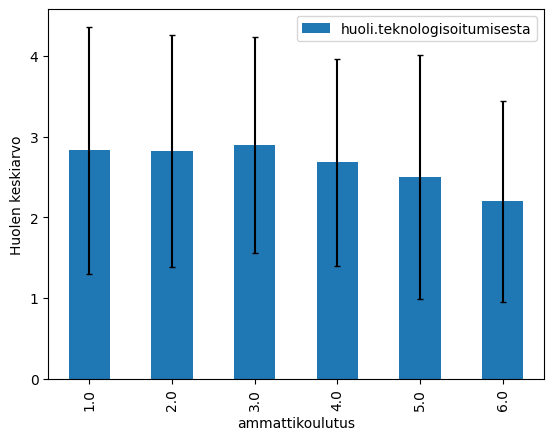

Selitteet: {1.0: 'ei ammatillista koulutusta', 2.0: 'ammattikurssi, muu lyhyt ammattikoulutus', 3.0: 'ammattikoulu, kouluasteen ammatillinen tutkinto', 4.0: 'opistotasoinen ammattikoulutus', 5.0: 'ammattikorkeakoulututkinto', 6.0: 'yliopisto- tai korkeakoulututkinto'}


In [13]:
huoli_mean = baro_huoli.pivot_table(index="ammattikoulutus", aggfunc="mean")
huoli_std = baro_huoli.pivot_table(index="ammattikoulutus", aggfunc="std")
huoli_mean.plot(kind="bar", yerr=huoli_std * 2, capsize=2, ylabel="Huolen keskiarvo")
plt.show()
print(f"Selitteet: {meta_baro.value_labels['labels4']}")

Pylväsdiagrammista nähdään, että vaihtelua ammattiluokkien kesken ei ole kolmen ensimmäisen luokan välillä kovin pajoa (ei ammatillista koulutusta, ammattikurssi, muu lyhyt ammattikoulutus, ammattikoulu, kouluasteen ammatillinen tutkinto), mutta kolmen viimeisen luokan kohdalla (opistotasoinen ammattikoulutus, ammattikorkeakoulututkinto, yliopisto- tai korkeakoulututkinto) huolen keskiarvo vaikuttaa laskevan hieman, kun siirrymme kohti korekampaa koulutusastetta. Jokaisen luokan huolen keskiarvon 95,5% luottamusvälit ovat myö melko suuria.

### b)

Nollahypoteesi: huolen kokeminen ei eroa koulutusasteiden luokkien välillä.

Tarkastellaan teknologisoitumiseen liittyvän huolen jakaumaa ammattiluokkien kesken.


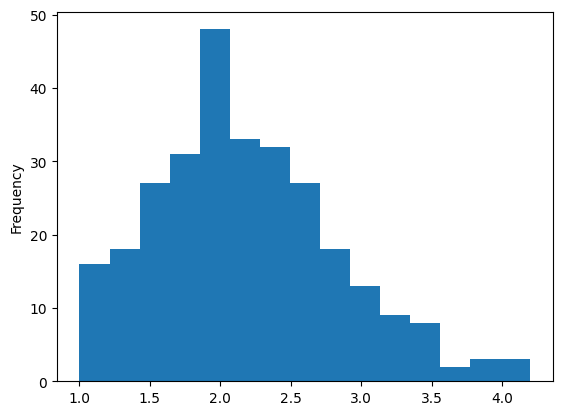

Luokkaa vastaava aineiston koko: 288


In [14]:
ammattiluokka = 6  # muutetaan välillä 1-6
baro_huoli[baro_huoli["ammattikoulutus"] == ammattiluokka]["huoli.teknologisoitumisesta"].plot(kind="hist", bins=15)
plt.show()
print(f"Luokkaa vastaava aineiston koko: {baro_huoli[baro_huoli['ammattikoulutus'] == ammattiluokka]['huoli.teknologisoitumisesta'].shape[0]}")

Jakaumien silmämääräisen tarkastelun perusteella, niiden voidaan olettaa olevan jokseenkin normaalijakautuneita. Toisaalta, aineston koko eri luokkia kohden vaihtelee. Nämä ovat, alkaen "ei ammatillista koulutusta": 101, 50, 214, 201, 168 ja 288. Tämä havainto on hyvä pitää mielessä, sillä viimeinen luokka (yliopisto- tai korkeakoulututkinto) on yliedustettua, kun taas toinen luokka (ammattikurssi, muu lyhyt ammattikoulutus) on aliedustettua.

Jatketaan analyysia. Koska kyseessä on lähes normaalisti jakautunut aineisto, luokkia on enemmän kuin 2, ja kysessä on luokkien välinen asetelma, valitaan tilastolliseksi testiksi one-way ANOVA.

In [15]:
from scipy.stats import f_oneway

fstat, pvalue = f_oneway(*[baro_huoli[baro_huoli["ammattikoulutus"] == key]["huoli.teknologisoitumisesta"] for key in meta_baro.value_labels['labels4']])

print(f"p = {pvalue}, f = {fstat}")

p = 6.422976466645804e-31, f = 32.62283644145993


Koska p-arvo << 0,05, voimme hylätä nollahypoteesin ja todeta, että jakaumien väleillä on tilastollisesti merkitsevä ero. Tulos on mielestäni ehkä hieman ristiriidassa a-kohdassa tehtyjen havaintojen kanssa. Tehdään post-hoc analyysi ja testattan kaksi ensimmäistä luokkaa, näiden p-arvon pitäisi olla suurempi. Käytetään tähän t-testiä.

In [16]:
_, pvalue = ttest_ind(baro_huoli[baro_huoli["ammattikoulutus"] == 1]["huoli.teknologisoitumisesta"], baro_huoli[baro_huoli["ammattikoulutus"] == 2]["huoli.teknologisoitumisesta"])
print(f"p = {pvalue}")

p = 0.9650400618292158


Nyt selvästi p-arvo > 0,05, joten kahden ensimmäisen ammattiluokan välillä ei ole tilastollisesti merkittävää eroa. Tämä on järkevää a-kohdan tarkastelujen perusteella. Testataan vielä 2. luokkaa ja 6. luokkaa. Nyt merkittävä ero pitäisi olla.

In [17]:
_, pvalue = ttest_ind(baro_huoli[baro_huoli["ammattikoulutus"] == 2]["huoli.teknologisoitumisesta"], baro_huoli[baro_huoli["ammattikoulutus"] == 6]["huoli.teknologisoitumisesta"])
print(f"p = {pvalue}")

p = 5.340387225356765e-10


...ja näin onkin. Post-hoc testien mukaan voi olla mielekästä tarkastella vielä tarkemmin luokkien keskeisiä eroja tilastollisen merkittävyyden analysoinnissa. Mutta on hyvä muistaa, että ANOVA ja post-hoc testit vastaavat hyvin erilaisiin kysymyksiin.

Mitä tulee kokonaistestit efektinkokoon, osoittautuu, että Pythonin statistiikan kirjastot eivät ole kovin monipuolisia efektin laskemiseen tarjottujen työkalujen suhteen. Tämä tuli hieman yllätyksenä. Kopioidaan efektin laskemiseen löydetty koodi suoraan netistä täältä: https://stats.stackexchange.com/questions/67926/understanding-the-one-way-anova-effect-size-in-scipy (jää itsellenikin muistiin!)

In [18]:
import scipy.special as special

def FPvalue( *args):
    """ Return F an p value

    """
    df_btwn, df_within = __degree_of_freedom_( *args)

    mss_btwn = __ss_between_( *args) / float( df_btwn)   
    mss_within = __ss_within_( *args) / float( df_within)

    F = mss_btwn / mss_within    
    P = special.fdtrc( df_btwn, df_within, F)

    return( F, P)

def EffectSize( *args):
    """ Return the eta squared as the effect size for ANOVA

    """    
    return( float( __ss_between_( *args) / __ss_total_( *args)))

def __concentrate_( *args):
    """ Concentrate input list-like arrays

    """
    v = list( map( np.asarray, args))
    vec = np.hstack( np.concatenate( v))
    return( vec)

def __ss_total_( *args):
    """ Return total of sum of square

    """
    vec = __concentrate_( *args)
    ss_total = sum( (vec - np.mean( vec)) **2)
    return( ss_total)

def __ss_between_( *args):
    """ Return between-subject sum of squares

    """    
    # grand mean
    grand_mean = np.mean( __concentrate_( *args))

    ss_btwn = 0
    for a in args:
        ss_btwn += ( len(a) * ( np.mean( a) - grand_mean) **2)

    return( ss_btwn)

def __ss_within_( *args):
    """Return within-subject sum of squares

    """
    return( __ss_total_( *args) - __ss_between_( *args))

def __degree_of_freedom_( *args):
    """Return degree of freedom

       Output-
              Between-subject dof, within-subject dof
    """   
    args = list( map( np.asarray, args))
    # number of groups minus 1
    df_btwn = len( args) - 1

    # total number of samples minus number of groups
    df_within = len( __concentrate_( *args)) - df_btwn - 1

    return( df_btwn, df_within)

In [19]:
etasq = EffectSize(*[baro_huoli[baro_huoli["ammattikoulutus"] == key]["huoli.teknologisoitumisesta"] for key in meta_baro.value_labels['labels4']])

print(f"Etan neliö: {etasq}")

Etan neliö: 0.13833620583033857


Koska etan neliö on välillä 0,06–0,14, on efektin koko keskisuuri. Sinäänsä järkevä tulos jos edelleen palataan a-kohtaan.

### c)

Laskteaan suurin yksittäinen kahden koulutusasteen välinen keskiarvoero:

In [20]:
huoli_pivot = baro_huoli.pivot_table(index="ammattikoulutus", aggfunc="mean")
max_mean = np.max(np.abs(huoli_pivot.values - huoli_pivot.values.T))
# numpy taikoja
ind = np.unravel_index(np.argmax(np.abs(huoli_pivot.values - huoli_pivot.values.T)), (huoli_pivot.values - huoli_pivot.values.T).shape)

print(f"Suurin kahden luokan keskiarvon ero on {max_mean}, joka löytyi luokkien {ind[0]+1} ja {ind[1]+1} väliltä.")

Suurin kahden luokan keskiarvon ero on 0.6948468328141226, joka löytyi luokkien 3 ja 6 väliltä.


Eli suurin yksittäinen kahden koulutusasteen välinen keskiarvoero on ~0,69 ja se on luokkien 'ammattikoulu, kouluasteen ammatillinen tutkinto' ja 'yliopisto- tai korkeakoulututkinto' välillä. Tämä on sopusoinnussa a-kohdan kanssa!

## Tehtävä 4

Tarkastellaan vain ryhmää, jossa koehenkilöt tekivät tehtäviä verkkokaupassa.

In [21]:
brand_tasks = df_brands[df_brands["Group"] == 2]
brand_tasks.columns

Index(['Subject id', 'Age (years)', 'Gender', 'Group',
       'Brand experience Amazon', 'Brand experience Jasmine',
       'Brand experience Apple', 'Brand experience Boostep',
       'Brand experience Ikea', 'Task time Amazon (s)',
       'Task time Jasmine (s)', 'Task time Apple (s)', 'Task time Boostep (s)',
       'Task time Ikea (s)', 'Visual appeal Amazon', 'Visual appeal Jasmine',
       'Visual appeal Apple', 'Visual appeal Boostep', 'Visual appeal Ikea',
       'Feeling of control Amazon', 'Feeling of control Jasmine',
       'Feeling of control Apple', 'Feeling of control Boostep',
       'Feeling of control Ikea', 'Feeling of frustration Amazon',
       'Feeling of frustration Jasmine', 'Feeling of frustration Apple',
       'Feeling of frustration Boostep', 'Feeling of frustration Ikea',
       'group = 2 (FILTER)'],
      dtype='object')

### a) Tee boxplot-kuvio, jossa koehenkilön tehtävään käyttämä aika on jaettu viiden verkkosivun mukaan.

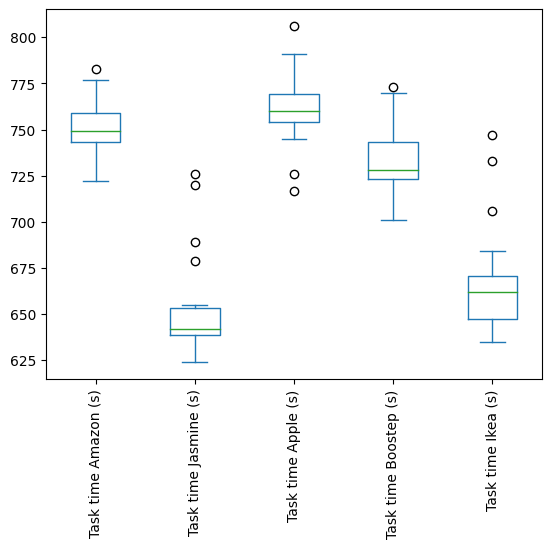

In [22]:
site_names = ["Task time Amazon (s)", "Task time Jasmine (s)", "Task time Apple (s)", "Task time Boostep (s)", "Task time Ikea (s)"]
site_times = brand_tasks[site_names]
site_times.plot(kind="box", rot=90)
plt.show()

Boxplotin mukaan, vastausajoissa on paljon vaihtelue verkkosivujen välillä. Lähimpänä toisiaan ovat ehkä Amazon ja Apple, joiden välillä ei ehkä ole merkitsevää tilastollista eroa. Otoksen kokoon nähden, poikkeavia havaintoja (95% varmuusvälin ulkopuolella) on myös aika paljon, jos oletamme normaalijakauman. Data ehkä ole normaalisti jakautunutta.

### b)

Tarkastellaan ensin vastausaikojen jakaumia.

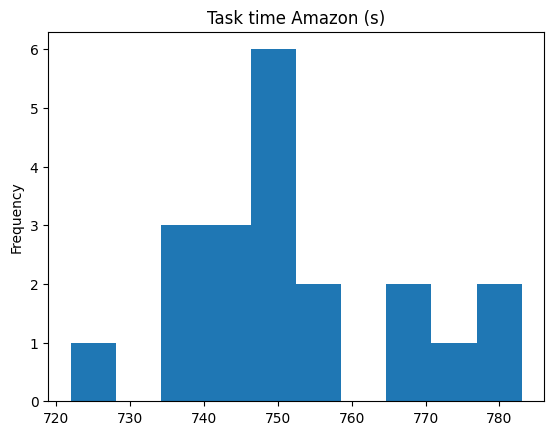

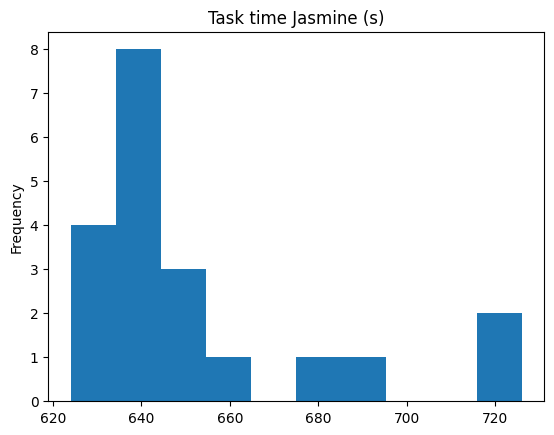

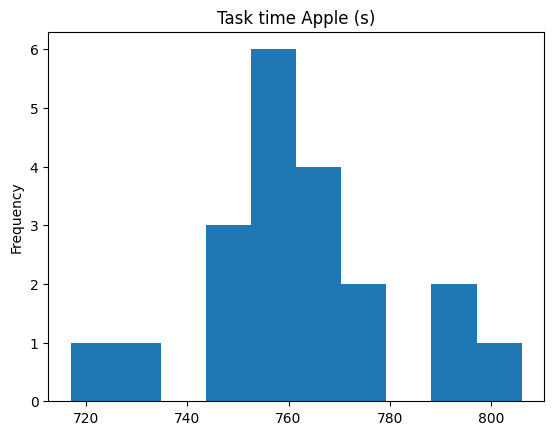

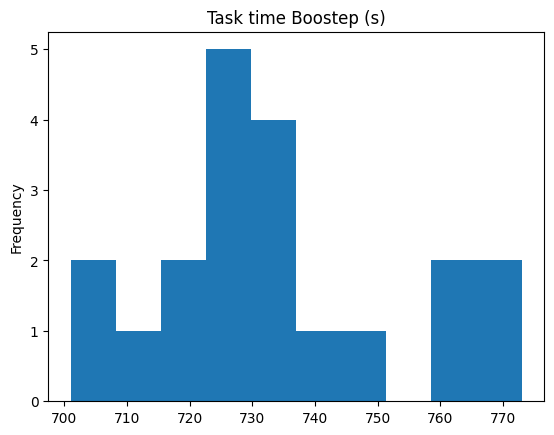

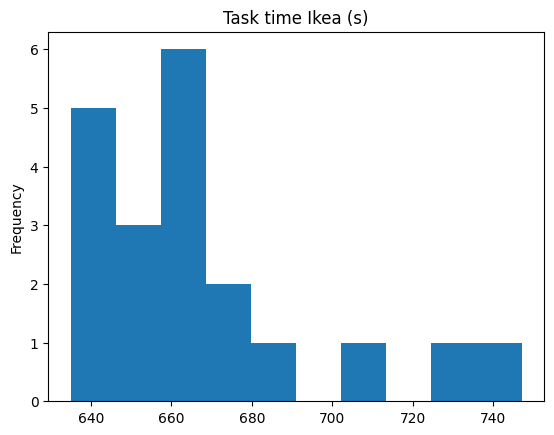

In [23]:
for site_name in site_names:
    site_times[site_name].plot(kind="hist", title=site_name)
    plt.show()

Tarkastelemalla yllä olevie histogrammeja, ei voida sanoa niiden kaikkien olevan normaalisti jakautuneita. Erityisesti Amazon ja Ikea ajat ovat selvästi vinoja muihin jakaumiin verrattuna.

Nollahypoteesi: verkkosivujen välisissä jakaumissa ei ole tilastollisesti merkitseviä eroja.

Koska tarkasteltavassa aineistossa osa riippuvien muuttujien jakaumista ovat vinoja, vertailtavia luokkia on enemmän kuin kaksi, ja kyseessä on ryhmien välinen asetelma, valitaan parametritön Kruskal-Wallis H testi nollahypoteesin testaamiseksi.

In [24]:
from scipy.stats import kruskal

hstat, pvalue = kruskal(*[site_times[name] for name in site_names])

print(f" p = {pvalue}, h = {hstat}")

 p = 6.824822594777914e-15, h = 72.47094380053178


Koska p-arvo << 0,5 voidaan nollahypoteesi hylätä ja todeta, että ryhmien välisissä jakaumissa on tilastolliesti merkitseviä eroja. Siirrytään seuraavaksi post-hoc analyysiin ja tarkastellaan jakaumapareja. Käyteteään parien väliseen testaukseen Mann-Whitney U testiä ja efektinkoon arviointii Cliffin deltaa, koska kaikki jakaumat eivät ole normaalisti jakautuneita.

In [25]:
from itertools import combinations

# kaikki mahdolliset verkkosivu-parit (ilman toistuvia pareja, järjestyksellä ei väliä.
unique_name_combos = [list(comb) for comb in combinations(site_names, 2)]

for combo in unique_name_combos:
    ustat, pvalue = mannwhitneyu(site_times[combo[0]], site_times[combo[1]])
    
    d_cliff = (2*ustat) / (
        site_times[combo[0]].shape[0] * 
        site_times[combo[1]].shape[0]) - 1
    
    # tilastollisesti merkitsevä? ( p < 0.05)
    if pvalue < 0.05:
        print(f"{combo[0]} - {combo[1]}:\t\tp = {pvalue};\teffect size (Cliff's delta) = {d_cliff}")
    else:
        print(f"{combo[0]} - {combo[1]}:\t\tp = {pvalue};\tNOT SIGNIFICANT")

Task time Amazon (s) - Task time Jasmine (s):		p = 7.854025196063006e-08;	effect size (Cliff's delta) = 0.9950000000000001
Task time Amazon (s) - Task time Apple (s):		p = 0.05299162434749472;	NOT SIGNIFICANT
Task time Amazon (s) - Task time Boostep (s):		p = 0.0023290760902093745;	effect size (Cliff's delta) = 0.565
Task time Amazon (s) - Task time Ikea (s):		p = 2.3781544214164504e-07;	effect size (Cliff's delta) = 0.9575
Task time Jasmine (s) - Task time Apple (s):		p = 9.774431790622715e-08;	effect size (Cliff's delta) = -0.9875
Task time Jasmine (s) - Task time Boostep (s):		p = 5.15687043649752e-07;	effect size (Cliff's delta) = -0.9299999999999999
Task time Jasmine (s) - Task time Ikea (s):		p = 0.02299681998845107;	effect size (Cliff's delta) = -0.4225
Task time Apple (s) - Task time Boostep (s):		p = 0.0004321172294012902;	effect size (Cliff's delta) = 0.6525000000000001
Task time Apple (s) - Task time Ikea (s):		p = 1.6482903624405587e-07;	effect size (Cliff's delta) = 0.97
T

Muistutuksena, että tässä testataan taas nollahypoteesia, eli että jakaumien välillä ei ole eroa. Yllä olevasta tulosteesta nähdään, että merkittavyyden raja-arvolla 0,05, ainoastaan Amazonin ja Applen välillä ei vaikuta olevan tilastollisesti merkitsevää eroa, eli jakaumat eivät poikkea toisistaan tilastollisessa mielessä. Jos tätä havaintoa verrataan a-kohdan boxplot-kuvioihin ja tehtyihin havaintoihin, tulos on järkevä. Lisäksi, muiden jakaumaparien merkitsevä tilastollinen poikkeavuus on myös a-kohdan kuvio huomioiden järkevää.

Efektin koon arvioinnissa käytettiin Cliffin deltaa. Cliffin deltan tulkitseminen on annettu tehtävässä 2. Kuten yllä olevasta tulosteesta nähdään, monet Cliffin deltan arvot tilastollisesti merkitsevästi eroaville jakaumille ovat lähellä joko 1 tai -1. Tämä on järkevää, sillä se viittaa siihen, että jakaumien kesken on vähän päällekkäisyyttä. Suurin (itseisarvollisesti) efektin koko havaittiin Jasminen ja Applen verkkosivujen välillä, pienin taas Jasminen ja Ikean. Huomataan myös, että suurilla merkitsevillä p-arvoilla, Cliffin deltan arvo on lähempänä nollaa, kuin pienilla p-arvoilla. Tämä on myös järkevää.